<a href="https://colab.research.google.com/github/eeeewn/IBM2022/blob/main/%EC%9A%A9%EC%82%B0%EA%B5%AC_%EC%9B%94%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

따릉이 이용자 특징 분류 (용산구 한정)

: 먼저 이용건수 많은 특정 대여소 도출

: 해당 대여소의 이용자 특징 

(성별, 연령대, 운동량 및 탄소량) 활용하여 이용자 분류

: 이용수를 늘리기 위해서 각 대여소별 효율적인 방안 제시

대여소별 이용건수

해당 대여소 이용자 특징

#준비


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

bike = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구16.xlsx")
bike1  = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구1월.xlsx")
bike2 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구2월.xlsx")
bike3 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구3월.xlsx")
bike4  = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구4월.xlsx")
bike5  = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구5월.xlsx")
bike6  = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ITB/용산구6월.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#기본정보

In [ ]:
bike

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-01-01,800,800. 목월공원 앞,단체,M,40대,2,176.71,1.38,5949.60,120
1,2022-01-01,800,800. 목월공원 앞,일일(비회원),\N,기타,2,120.28,1.08,4672.74,58
2,2022-01-01,800,800. 목월공원 앞,일일(회원),\N,10대,6,535,4.34,18764.02,570
3,2022-01-01,800,800. 목월공원 앞,일일(회원),\N,20대,14,1097.91,9.42,40631.75,379
4,2022-01-01,800,800. 목월공원 앞,일일(회원),\N,30대,5,178.77,1.51,6497.15,140
...,...,...,...,...,...,...,...,...,...,...,...
22456,2022-06-01,4639,4639. 동빙고근린공원,정기,M,30대,8,686.79,5.67,24405.69,344
22457,2022-06-01,4639,4639. 동빙고근린공원,정기,M,40대,15,2900.89,22.47,96820.20,566
22458,2022-06-01,4639,4639. 동빙고근린공원,정기,M,50대,9,1600.71,14.41,62087.24,459
22459,2022-06-01,4639,4639. 동빙고근린공원,정기,M,60대,1,37.39,0.32,1388.41,9


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22461 entries, 0 to 22460
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여일자     22461 non-null  datetime64[ns]
 1   대여소번호    22461 non-null  int64         
 2   대여소명     22461 non-null  object        
 3   대여구분코드   22461 non-null  object        
 4   성별       19964 non-null  object        
 5   연령대코드    22461 non-null  object        
 6   이용건수     22461 non-null  int64         
 7   운동량      22461 non-null  object        
 8   탄소량      22461 non-null  object        
 9   이동거리(M)  22461 non-null  float64       
 10  이용시간(분)  22461 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 1.9+ MB


#전처리

In [ ]:
pd.isna(bike).sum()

대여일자          0
대여소번호         0
대여소명          0
대여구분코드        0
성별         2497
연령대코드         0
이용건수          0
운동량           0
탄소량           0
이동거리(M)       0
이용시간(분)       0
dtype: int64

In [ ]:
bike['성별'].value_counts()

M     7157
\N    6607
F     6189
m        9
f        2
Name: 성별, dtype: int64

In [ ]:
bike['성별'] = np.where(bike['성별'] == 'm', 'M', bike['성별'])
bike['성별'] = np.where(bike['성별'] == 'f', 'F', bike['성별'])


In [ ]:
bike['월'] = np.where(bike['대여일자'] == '2022-01-01', '1월',
                     np.where(bike['대여일자'] == '2022-02-01', '2월',
                               np.where(bike['대여일자'] == '2022-03-01', '3월',
                                         np.where(bike['대여일자'] == '2022-04-01', '4월',
                                                   np.where(bike['대여일자'] == '2022-05-01', '5월', '6월')))))

<ipython-input-10-f0d4a09046f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['월'] = np.where(bike['대여일자'] == '2022-01-01', '1월',


In [ ]:
bike['운동량'].value_counts()

0           292
\N           23
48.13         6
51.74         5
35.26         5
           ... 
1607.77       1
14965.25      1
4807.54       1
344.53        1
374.98        1
Name: 운동량, Length: 18403, dtype: int64

In [ ]:
bike['탄소량'].value_counts()

0.00      291
0.61       54
0.32       53
0.35       52
0.30       50
         ... 
46.47       1
225.44      1
222.00      1
76.95       1
17.76       1
Name: 탄소량, Length: 5154, dtype: int64

In [ ]:
bike['운동량'] = np.where(bike['운동량'] == r'\N', np.nan, bike['운동량'])

In [ ]:
bike= bike.dropna()

#대여소별


##대여소별 빈도

In [ ]:
bike_place_n = bike.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum'))
bike_place_n

,대여소명,n
0,4602. 숙명여대앞 버스정류소 주변,1753
1,4603. 한강GS에클라트 건너편 교통섬,3777
2,4604. 원효로다목적체육관 앞,1921
3,"4605. 노들섬 다목적홀(동쪽) 숲, 앞",3334
4,4607. 국립중앙박물관 -용산가족공원 앞,2602
...,...,...
85,865.하얏트호텔 앞,493
86,866.브라운스톤 남산아파트,3291
87,867.서빙고역 광장(1번출구),2157
88,869.노들섬 동측 앞,2288


In [ ]:
#대여소 이용건수 상위20
bike_place_n.sort_values('n', ascending=False).head(20)

,대여소명,n
76,853.용산역 맞은편,20978
89,870.노들섬 서측 앞,17806
50,825. 서빙고동 주민센터 앞,15120
61,837. 한남나들목 입구,11997
54,829. 베르가모앞,11933
65,841. 신용산역 1번 출구,10553
45,818. 숙명여대 입구 교차로,10495
43,816. 신용산역 6번출구 앞,9539
82,860.LG한강 자이아파트 앞,9273
62,838. 숙대입구역 4번출구,9090


In [ ]:
#대여소 이용건수 하위10
bike_place_n.sort_values('n').head(10)

,대여소명,n
27,4637. 용산시티파크 101동 앞,152
28,4638. 청파동삼거리 앞,199
29,4639. 동빙고근린공원,292
26,4636. 용산구꿈나무종합타운 앞,486
85,865.하얏트호텔 앞,493
81,859.남산공원 야외식물원 앞,514
70,847. 국방부민원실옆,827
9,4612. 한남 준 J.FSS 앞,856
32,803. 한남초교 앞 보도육교,890
77,854.HID 유족동지회 앞,972


##월별 대여소별 이용건수

In [ ]:
#대여소별 월별 이용건수
bike.groupby(['대여소명', '월'],  as_index= False).agg(n = ('이용건수', 'sum'))


,대여소명,월,n
0,4602. 숙명여대앞 버스정류소 주변,1월,199
1,4602. 숙명여대앞 버스정류소 주변,2월,194
2,4602. 숙명여대앞 버스정류소 주변,3월,286
3,4602. 숙명여대앞 버스정류소 주변,4월,447
4,4602. 숙명여대앞 버스정류소 주변,5월,227
...,...,...,...
509,870.노들섬 서측 앞,2월,686
510,870.노들섬 서측 앞,3월,2121
511,870.노들섬 서측 앞,4월,4526
512,870.노들섬 서측 앞,5월,5758


In [ ]:
#월별 대여소별 이용건수
#1월
bike1.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum')).sort_values('n', ascending=False)


,대여소명,n
70,853.용산역 맞은편,1363
44,825. 서빙고동 주민센터 앞,853
48,829. 베르가모앞,692
37,816. 신용산역 6번출구 앞,690
39,818. 숙명여대 입구 교차로,689
...,...,...
46,827. 국군복지단,78
72,855.이촌역5번출구 앞,77
9,4612. 한남 준 J.FSS 앞,73
71,854.HID 유족동지회 앞,69


In [ ]:
#2월
bike2.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum')).sort_values('n', ascending=False).head(5)


,대여소명,n
70,853.용산역 맞은편,1314
44,825. 서빙고동 주민센터 앞,901
39,818. 숙명여대 입구 교차로,798
37,816. 신용산역 6번출구 앞,731
55,837. 한남나들목 입구,719


In [ ]:
#3월
bike3.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum'))\
.sort_values('n', ascending=False).head(5)


,대여소명,n
72,853.용산역 맞은편,2596
85,870.노들섬 서측 앞,2179
50,829. 베르가모앞,1608
46,825. 서빙고동 주민센터 앞,1582
41,818. 숙명여대 입구 교차로,1554


In [ ]:
#4월
bike4.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum'))\
.sort_values('n', ascending=False).head(5)

,대여소명,n
72,853.용산역 맞은편,4721
85,870.노들섬 서측 앞,4659
46,825. 서빙고동 주민센터 앞,3411
57,837. 한남나들목 입구,3011
50,829. 베르가모앞,2812


In [ ]:
#5월
bike5.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum'))\
.sort_values('n', ascending=False).head(5)

,대여소명,n
71,853.용산역 맞은편,6533
84,870.노들섬 서측 앞,5925
46,825. 서빙고동 주민센터 앞,4966
50,829. 베르가모앞,3838
57,837. 한남나들목 입구,3735


In [ ]:
#6월
bike6.groupby('대여소명', as_index= False).agg(n = ('이용건수', 'sum')).sort_values('n', ascending=False).head(5)

,대여소명,n
75,853.용산역 맞은편,5165
88,870.노들섬 서측 앞,4302
50,825. 서빙고동 주민센터 앞,3888
61,837. 한남나들목 입구,2741
54,829. 베르가모앞,2661


#월별 이용건수

In [ ]:
#월별 이용건수
bike.groupby('월', as_index= False).agg(n = ('이용건수', 'sum'))

,월,n
0,1월,25173
1,2월,25745
2,3월,51516
3,4월,91190
4,5월,114094
5,6월,93279


#top10 대여소별


In [ ]:
bike_top10 = bike.query('대여소번호 in [ 853, 825, 829, 870, 837, 841, 818, 816, 860, 838]')
bike_top10

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),월
449,2022-01-01,816,816. 신용산역 6번출구 앞,단체,\N,20대,2,289.54,2.02,8704.15,76,1월
450,2022-01-01,816,816. 신용산역 6번출구 앞,일일(비회원),\N,기타,7,325.75,2.94,12655.65,165,1월
451,2022-01-01,816,816. 신용산역 6번출구 앞,일일(회원),\N,20대,15,634.31,5.25,22629.79,341,1월
452,2022-01-01,816,816. 신용산역 6번출구 앞,일일(회원),\N,30대,9,385.19,3.45,14876.32,338,1월
453,2022-01-01,816,816. 신용산역 6번출구 앞,일일(회원),\N,40대,1,126.38,0.85,3668.33,25,1월
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,2022-06-01,870,870.노들섬 서측 앞,정기,M,40대,109,19077.39,149.82,645716.57,4390,6월
21120,2022-06-01,870,870.노들섬 서측 앞,정기,M,50대,65,14409.09,113.84,490524.32,2558,6월
21121,2022-06-01,870,870.노들섬 서측 앞,정기,M,60대,40,2782.34,22.06,95041.71,1115,6월
21122,2022-06-01,870,870.노들섬 서측 앞,정기,M,70대이상,3,276.02,2.74,11810.09,110,6월


##평균 이동거리

In [ ]:
#대여소별 평균 이동거리
bike_top10_distance= bike_top10.groupby('대여소명', as_index= False).agg(mean_distance = ('이동거리(M)', 'mean'))\
.sort_values('mean_distance', ascending=False)
bike_top10_distance

,대여소명,mean_distance
2,825. 서빙고동 주민센터 앞,275868.092303
4,837. 한남나들목 입구,233324.289630
9,870.노들섬 서측 앞,213394.475072
7,853.용산역 맞은편,209121.571475
3,829. 베르가모앞,173885.390605
8,860.LG한강 자이아파트 앞,146886.608266
6,841. 신용산역 1번 출구,132966.351309
1,818. 숙명여대 입구 교차로,109258.701674
0,816. 신용산역 6번출구 앞,99636.516097
5,838. 숙대입구역 4번출구,84500.365319


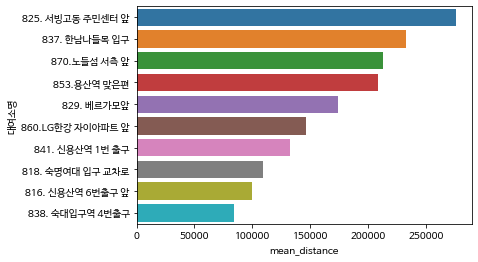

In [ ]:
sns.barplot(data = bike_top10_distance, x = 'mean_distance', y = '대여소명')

##평균 이용시간

In [ ]:
bike_top10.groupby('대여소명', as_index= False).agg(mean_time = ('이용시간(분)', 'mean'))\
.sort_values('mean_time', ascending=False)

,대여소명,mean_time
2,825. 서빙고동 주민센터 앞,1988.818182
9,870.노들섬 서측 앞,1899.710602
7,853.용산역 맞은편,1748.144543
4,837. 한남나들목 입구,1620.777778
3,829. 베르가모앞,1344.866242
8,860.LG한강 자이아파트 앞,1187.965944
6,841. 신용산역 1번 출구,1058.349091
1,818. 숙명여대 입구 교차로,1004.192469
0,816. 신용산역 6번출구 앞,870.501859
5,838. 숙대입구역 4번출구,796.081560


##평균 이용건수

In [ ]:
#대여소별 평균 이용건수
bike_top10.groupby('대여소명', as_index= False).agg(mean_num = ('이용건수', 'mean'))\
.sort_values('mean_num', ascending=False)

,대여소명,mean_num
7,853.용산역 맞은편,61.882006
9,870.노들섬 서측 앞,51.020057
2,825. 서빙고동 주민센터 앞,45.818182
1,818. 숙명여대 입구 교차로,43.912134
6,841. 신용산역 1번 출구,38.374545
3,829. 베르가모앞,38.003185
4,837. 한남나들목 입구,37.027778
0,816. 신용산역 6번출구 앞,35.460967
5,838. 숙대입구역 4번출구,32.234043
8,860.LG한강 자이아파트 앞,28.708978


##성별

성별 이용건수

In [ ]:
#여성 대여소 이용건수
bike_top10.query ('성별 == "F"').groupby ('대여소명', as_index = False) .agg (n_female = ('이용건수','sum'))\
.sort_values('n_female', ascending=False)

,대여소명,n_female
9,870.노들섬 서측 앞,5907
7,853.용산역 맞은편,5808
2,825. 서빙고동 주민센터 앞,5045
3,829. 베르가모앞,3467
4,837. 한남나들목 입구,3352
1,818. 숙명여대 입구 교차로,3210
8,860.LG한강 자이아파트 앞,3080
0,816. 신용산역 6번출구 앞,2590
6,841. 신용산역 1번 출구,2372
5,838. 숙대입구역 4번출구,1974


In [ ]:
#남성 대여소 이용건수
bike_top10.query ('성별 == "M"').groupby ('대여소명', as_index = False) .agg (n_male = ('이용건수','sum'))\
.sort_values('n_male', ascending=False)

,대여소명,n_female
7,853.용산역 맞은편,8184
2,825. 서빙고동 주민센터 앞,5502
9,870.노들섬 서측 앞,5467
6,841. 신용산역 1번 출구,4577
5,838. 숙대입구역 4번출구,4486
4,837. 한남나들목 입구,4450
3,829. 베르가모앞,4191
1,818. 숙명여대 입구 교차로,4057
0,816. 신용산역 6번출구 앞,3482
8,860.LG한강 자이아파트 앞,3295


In [ ]:
bike_top10_sex = bike_top10.groupby(['대여소명', '성별'] , as_index = False).agg(n = ('이용건수', 'sum'))\
.sort_values('n', ascending=False)
bike_top10_sex

,대여소명,성별,n
22,853.용산역 맞은편,M,8184
23,853.용산역 맞은편,\N,6986
29,870.노들섬 서측 앞,\N,6432
27,870.노들섬 서측 앞,F,5907
21,853.용산역 맞은편,F,5808
7,825. 서빙고동 주민센터 앞,M,5502
28,870.노들섬 서측 앞,M,5467
6,825. 서빙고동 주민센터 앞,F,5045
19,841. 신용산역 1번 출구,M,4577
8,825. 서빙고동 주민센터 앞,\N,4573


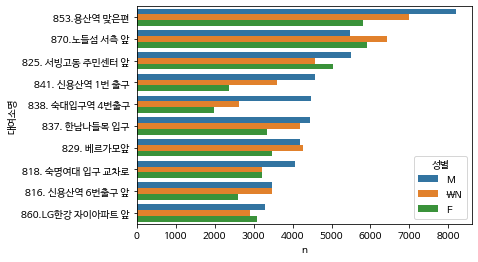

In [ ]:
sns.barplot(data = bike_top10_sex, x = 'n', y = '대여소명', hue = '성별')

##연령별

In [ ]:
#연령별 이용건수 
bike_top10.query ('연령대코드 == "10대"').groupby ('대여소명', as_index = False)\
 .agg (n = ('이용건수','sum')).sort_values('n', ascending=False)

,대여소명,n
9,870.노들섬 서측 앞,734
2,825. 서빙고동 주민센터 앞,695
7,853.용산역 맞은편,639
4,837. 한남나들목 입구,496
1,818. 숙명여대 입구 교차로,469
3,829. 베르가모앞,353
8,860.LG한강 자이아파트 앞,332
5,838. 숙대입구역 4번출구,283
6,841. 신용산역 1번 출구,200
0,816. 신용산역 6번출구 앞,191


In [ ]:
bike_top10_age =bike_top10.groupby(['대여소명', '연령대코드'], as_index = False)\
  .agg(n = ('이용건수', 'sum'))
bike_top10_age

,대여소명,연령대코드,n
0,816. 신용산역 6번출구 앞,10대,191
1,816. 신용산역 6번출구 앞,20대,3303
2,816. 신용산역 6번출구 앞,30대,3169
3,816. 신용산역 6번출구 앞,40대,1186
4,816. 신용산역 6번출구 앞,50대,637
...,...,...,...
75,870.노들섬 서측 앞,40대,1831
76,870.노들섬 서측 앞,50대,805
77,870.노들섬 서측 앞,60대,311
78,870.노들섬 서측 앞,70대이상,23


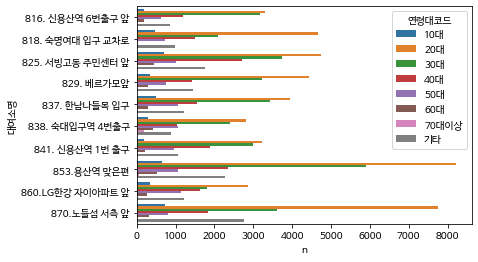

In [ ]:
sns.barplot(data = bike_top10_age, x = 'n', y = '대여소명', hue = '연령대코드')

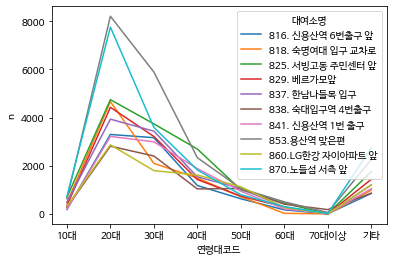

In [ ]:
sns.lineplot(data = bike_top10_age, x = '연령대코드', y = 'n', hue = '대여소명')

##월별

In [ ]:
#대여소별 월별 이용건수
bike_top10_month = bike_top10.groupby(['대여소명', '월'],  as_index= False).agg(n = ('이용건수', 'sum'))
bike_top10_month

,대여소명,월,n
0,816. 신용산역 6번출구 앞,1월,672
1,816. 신용산역 6번출구 앞,2월,711
2,816. 신용산역 6번출구 앞,3월,1252
3,816. 신용산역 6번출구 앞,4월,1901
4,816. 신용산역 6번출구 앞,5월,2751
5,816. 신용산역 6번출구 앞,6월,2252
6,818. 숙명여대 입구 교차로,1월,678
7,818. 숙명여대 입구 교차로,2월,771
8,818. 숙명여대 입구 교차로,3월,1516
9,818. 숙명여대 입구 교차로,4월,2203


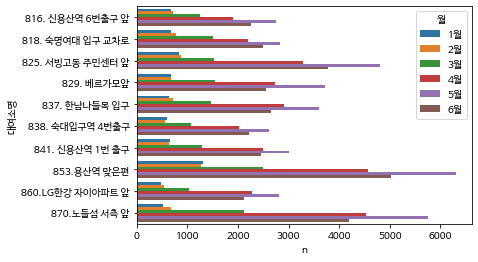

In [ ]:
sns.barplot(data = bike_top10_month, x = 'n', y = '대여소명', hue = '월')

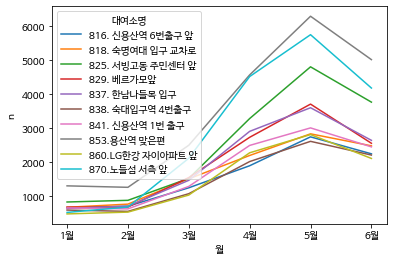

In [ ]:
sns.lineplot(data = bike_top10_month, x = '월', y = 'n', hue = '대여소명')

전반적으로 5월 이용건수 많음->날씨 영향?



#top10 기타

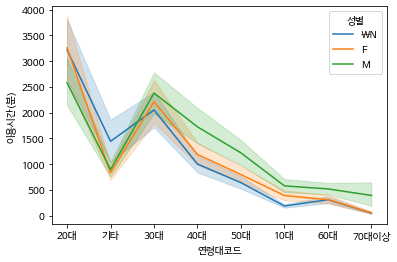

In [ ]:
sns.lineplot(data = bike_top10, x = '연령대코드', y = '이용시간(분)', hue = '성별')

#관계 분석

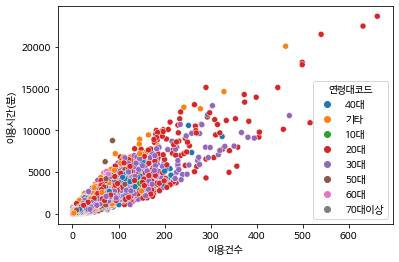

In [ ]:
#이용건수 이용시간
sns.scatterplot(data = bike, x = '이용건수', y = '이용시간(분)', hue = '연령대코드')

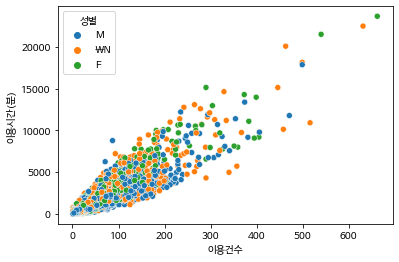

In [ ]:
##이용건수 이용시간
sns.scatterplot(data = bike, x = '이용건수', y = '이용시간(분)', hue = '성별')

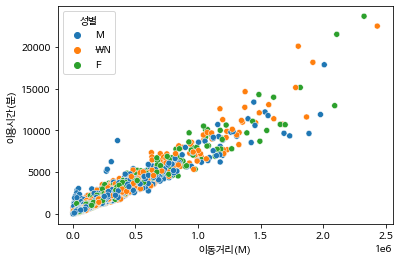

In [ ]:
#이동거리 이용시간
sns.scatterplot(data = bike, x = '이동거리(M)', y = '이용시간(분)', hue = '성별')

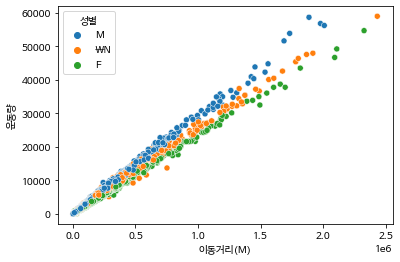

In [ ]:
#이동거리 운동량
sns.scatterplot(data = bike, x = '이동거리(M)', y = '운동량', hue = '성별')

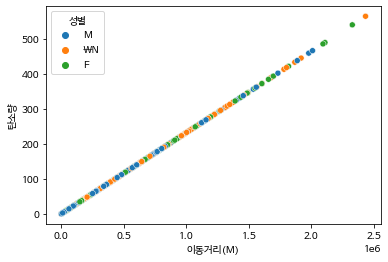

In [ ]:
#이동거리 탄소량
sns.scatterplot(data = bike, x = '이동거리(M)', y = '탄소량', hue = '성별')

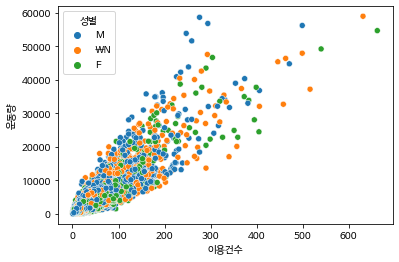

In [ ]:
#이용건수 운동량
sns.scatterplot(data = bike, x = '이용건수', y = '운동량', hue = '성별')

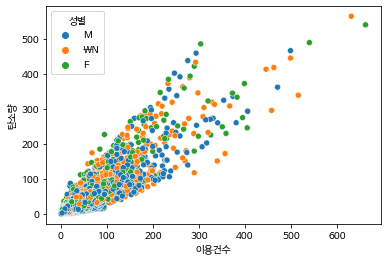

In [ ]:
#이용건수 탄소량
sns.scatterplot(data = bike, x = '이용건수', y = '탄소량', hue = '성별')

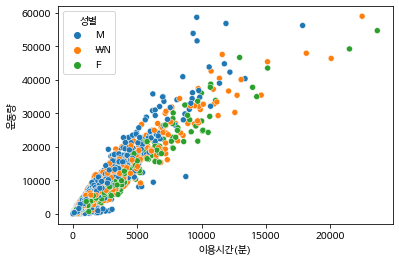

In [ ]:
#이동시간 운동량
sns.scatterplot(data = bike, x = '이용시간(분)', y = '운동량', hue = '성별')

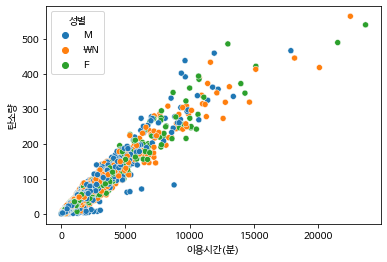

In [ ]:
#이동시간 탄소량
sns.scatterplot(data = bike, x = '이용시간(분)', y = '탄소량', hue = '성별')

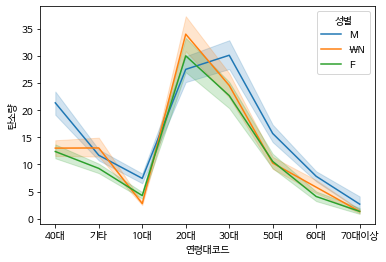

In [ ]:
sns.lineplot(data = bike, x = '연령대코드', y = '탄소량', hue = '성별')

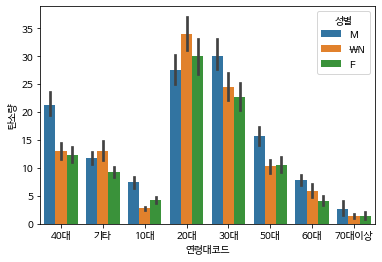

In [ ]:
sns.barplot(data = bike, x = '연령대코드', y = '탄소량', hue = '성별')

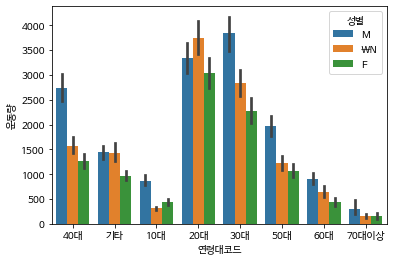

In [ ]:
sns.barplot(data = bike, x = '연령대코드', y = '운동량', hue = '성별')

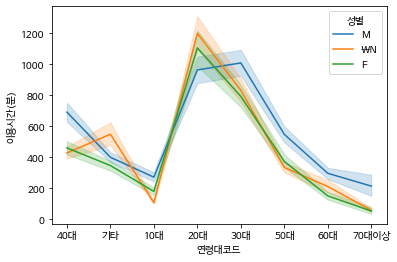

In [ ]:
#연령 이용시간
sns.lineplot(data = bike, x = '연령대코드', y = '이용시간(분)', hue = '성별')
#, order = ['10대', '20대', '30대','40대','50대','60대','70대이상','기타']

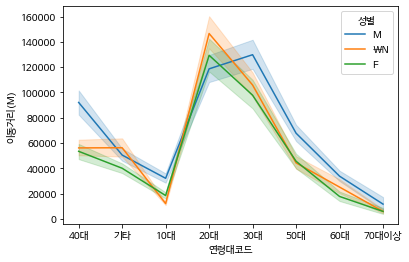

In [ ]:
sns.lineplot(data = bike, x = '연령대코드', y = '이동거리(M)', hue = '성별')

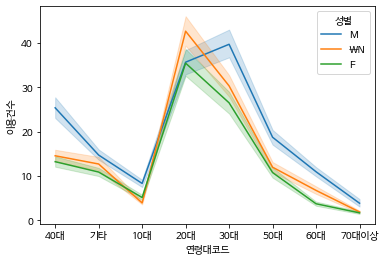

In [ ]:
sns.lineplot(data = bike, x = '연령대코드', y = '이용건수', hue = '성별')